In [1]:
import archives_manager

In [2]:
import chess
from chess import pgn, Board
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import game_state_classifier
from game_state_classifier import GAME_STATE

In [3]:
def count_moves_by_piece_type(game, player_name):
    game_pgn = game['pgn']
    chess_game = pgn.read_game(io.StringIO(game_pgn))

    board = Board()
    move_nodes = chess_game.mainline()

    player_color = archives_manager.get_color(game, player_name)

    move_counts = {}

    for state in GAME_STATE:
        move_counts[state.value]['pawn'] = 0
        move_counts[state.value]['piece'] = 0

    for node in move_nodes:
        if board.turn == player_color:
            state = game_state_classifier.predict_bst(game_state_classifier.extract_predictors_from_board(board))

            if board.piece_at(node.move.from_square).piece_type == chess.PAWN:
                move_counts[state] += 1
            else:
                piece_moves += 1
        board.push(node.move)

    return {
        'Pawn': pawn_moves,
        'Piece': piece_moves
    }

In [ ]:
def get_moves_data(game, player_name):
    

In [4]:
def get_move_type_proportion_data(player_name, num_games=100):
    recent_game_archive = archives_manager.get_most_recent_games(
        player_name,
        num_games=num_games,
        time_class='rapid',
        filter_func=archives_manager.build_archive_filter(rated=True, has_accuracies=True, exclude_draws=True, max_elo_diff=150)
    )

    for state in GAME_STATE:
        df = pd.DataFrame([count_moves_by_piece_type(game, player_name) for game in recent_game_archive])
        df['Total'] = df['Pawn'] + df['Piece']
        df['pawn_prop'] = df['Pawn'] / df['Total']
        df['piece_prop'] = df['Piece'] / df['Total']

    return df

In [5]:
df = get_move_type_proportion_data('big_tonka_t', num_games=100)

OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
MID M
OPEN O
OPEN O
OPEN O
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
END E
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
OPEN O
MID M
MID M
OPEN O
OPEN O
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
MID M
END E
END E
END E
END E
END E

Traceback (most recent call last):
  File "C:\Users\Adam Cunningham\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Adam Cunningham\AppData\Local\Temp\ipykernel_16036\974691094.py", line 1, in <module>
    df = get_move_type_proportion_data('big_tonka_t', num_games=100)
  File "C:\Users\Adam Cunningham\AppData\Local\Temp\ipykernel_16036\82504022.py", line 10, in get_move_type_proportion_data
    df = pd.DataFrame([count_moves_by_piece_type(game, player_name) for game in recent_game_archive])
  File "C:\Users\Adam Cunningham\AppData\Local\Temp\ipykernel_16036\82504022.py", line 10, in <listcomp>
    df = pd.DataFrame([count_moves_by_piece_type(game, player_name) for game in recent_game_archive])
  File "C:\Users\Adam Cunningham\AppData\Local\Temp\ipykernel_16036\3855867732.py", line 20, in count_moves_by_piece_type
    state = game_state_classifier.predict_bst(

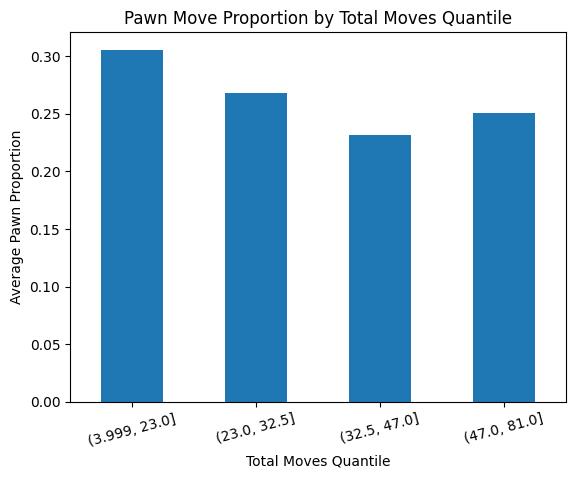

In [10]:
df['Total_Quantile'] = pd.qcut(df['Total'], q=4)

grouped = df.groupby('Total_Quantile', observed=False)
mean_pawn_props = grouped['pawn_prop'].mean()

mean_pawn_props.plot(kind='bar')
plt.title('Pawn Move Proportion by Total Moves Quantile')
plt.xlabel('Total Moves Quantile')
plt.ylabel('Average Pawn Proportion')
plt.xticks(rotation=15)
plt.show()